## Integrantes:
Diego Delgado,
Auri Morro,
Alvaro Zapata, Cesar Ortiz

## Ejercicio 1

Se usaron los siguientes valores para alfa: 0.5; 0.05; 0.1; -0.05; 0.005 y para el atols : 1e-1, 1e-2, 1e-3 

In [21]:
# !pip install -U scikit-learn

# Manipulating matrixes and DataFrames
import numpy as np
import pandas as pd

# Pre-build models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

Defaulting to user installation because normal site-packages is not writeable


In [22]:
# Load the Boston csv dataset
boston = pd.read_csv('https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/boston.csv')

In [23]:
# Mostrar las columnas de la base de datos
boston.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'lstat', 'medv'],
      dtype='object')

In [24]:
# Drop string columns
boston = boston.drop(columns=['Unnamed: 0', 'nox', 'rm', 'medv'])

In [25]:
# Dop missing values
boston = boston.dropna()

In [26]:
# Splitting into input and target variables
x = boston.drop('crim', axis=1)
y = boston['crim']

In [28]:
# Scaling data
x_scaled = scale(x)
y_scaled = scale(y)
x.columns

Index(['zn', 'indus', 'chas', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat'], dtype='object')

In [29]:
#Fit a Linear Regression Model
model = LinearRegression(fit_intercept=False)
model.fit(x_scaled, y_scaled)

LinearRegression(fit_intercept=False)

In [30]:
# Estimate coefficients
# Using the models attribute
print(model.coef_)


[ 0.09919024 -0.06938533 -0.0454977  -0.02567396 -0.14933125  0.55353601
 -0.02705505 -0.00671135  0.22400326]


In [31]:
coefs_df = pd.DataFrame(data=model.coef_, columns=["Coefs - Attribute"], index=x.columns)
coefs_df

,Coefs - Attribute
zn,0.099190
indus,-0.069385
chas,-0.045498
age,-0.025674
dis,-0.149331
rad,0.553536
tax,-0.027055
ptratio,-0.006711
lstat,0.224003


In [32]:
# Estimate coefficients
# Manually
Xtx = np.dot(x_scaled.T, x_scaled)
Xty = np.dot(x_scaled.T, y_scaled)
beta = np.linalg.solve(Xtx, Xty)
print(beta)

[ 0.09919024 -0.06938533 -0.0454977  -0.02567396 -0.14933125  0.55353601
 -0.02705505 -0.00671135  0.22400326]


In [33]:
coefs_df['Coefs - Beta'] = beta
coefs_df

,Coefs - Attribute,Coefs - Beta
zn,0.099190,0.099190
indus,-0.069385,-0.069385
chas,-0.045498,-0.045498
age,-0.025674,-0.025674
dis,-0.149331,-0.149331
rad,0.553536,0.553536
tax,-0.027055,-0.027055
ptratio,-0.006711,-0.006711
lstat,0.224003,0.224003


In [ ]:
# Initialize weights randomly
w0 = np.random.uniform(size=x_scaled.shape[1])

# Set the learning rate
alpha = 0.01

w1 = w0.copy()

# Set a loop that will continue untl break condition is met
while True:

    # Calculate predictions
    predictions = np.dot(x_scaled, w0)
    # Calculate errors
    errors = y_scaled - predictions
    # Calculate gradient (direction to adjust weights to minimize the loss function)
    gradient = -2 * np.dot(x_scaled.T, errors)
    # Update weights
    w1 = w0 - alpha * gradient

    # Check for convergence
    if np.allclose(w1, w0, atol=1e-12):
        break

    # Prepare for the next iteration
    w0 = w1.copy()

# Print final weights
print(w1)

In [ ]:
coefs_df['Coefs - GD'] = w1
coefs_df

## Ejercicio 2

El objetivo de este ejercicio es ilustrar c´omo el trade-off entre sesgo y varianza evoluciona con la
creciente complejidad de los modelos polin´omicos. Para este prop´osito, utilice el conjunto de datos
Portafolio. Considere los siguientes pasos:

a) Division del conjunto de datos: Separe los datos en un conjunto de entrenamiento y otro
de prueba, asignando el 20% de los datos al conjunto de prueba

In [13]:
# pip install mlxtend  

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [12]:
# Get data 
url = "https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/portafolio.csv"
df = pd.read_csv(url)
print(df.head())

   Unnamed: 0         X         Y
0           0 -0.895251 -0.234924
1           1 -1.562454 -0.885176
2           2 -0.417090  0.271888
3           3  1.044356 -0.734198
4           4 -0.315568  0.841983


In [13]:
# a) Division de conjunto de datos

# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['Y']).values
y = df['Y'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

Tamaño del conjunto de entrenamiento: 80
Tamaño del conjunto de prueba: 20


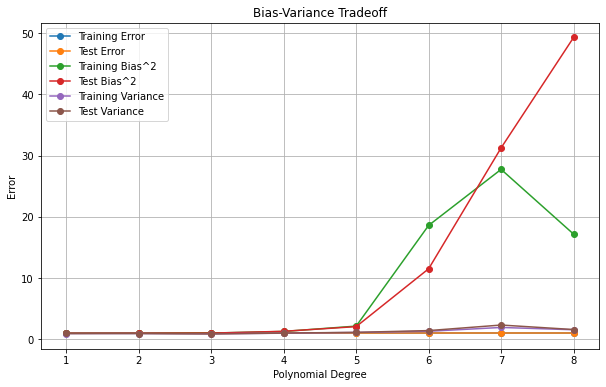

In [15]:
# b) Ajuste de modelos polinómicos
degrees = range(1, 9)
train_errors = []
test_errors = []
train_bias = []
test_bias = []
train_variance = []
test_variance = []

for degree in degrees:
    # Ajustar el modelo polinómico
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Calcular errores cuadráticos medios
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    # Calcular sesgo y varianza
    bias_train, variance_train, mse_train = bias_variance_decomp(model, X_train_poly, y_train, X_test_poly, y_test, loss='mse')
    bias_test, variance_test, mse_test = bias_variance_decomp(model, X_train_poly, y_train, X_test_poly, y_test, loss='mse')
    train_bias.append(bias_train)
    test_bias.append(bias_test)
    train_variance.append(variance_train)
    test_variance.append(variance_test)

# c) Descomposición sesgo-varianza
# Ya se ha realizado dentro del bucle en el paso b)

# d) Visualización
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.plot(degrees, train_bias, label='Training Bias^2', marker='o')
plt.plot(degrees, test_bias, label='Test Bias^2', marker='o')
plt.plot(degrees, train_variance, label='Training Variance', marker='o')
plt.plot(degrees, test_variance, label='Test Variance', marker='o')
plt.title('Bias-Variance Tradeoff')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

## Ejercicio 3

La Tabla 1 resume las ventajas y desventajas de cada enfoque: k-fold cross validation y Validación cruzada dejando uno fuera.


### Tabla 1



| Enfoque | Ventajas                                                                                                        | Desventajas                                                                                                        |
|---------|-----------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------|
| k-fold Cross-Validation     | - Utiliza eficientemente los datos. Ya que todas las observaciones son asignadas tanto a entrenamiento como a vaidación .                                                                                   | - Costoso computacionalmente, especialmente con k grande o modelos complejos.                                        |
|                             | - Proporciona una estimación robusta del rendimiento del modelo.                                                     | - La elección de k puede ser arbitraria y afectar la estimación del rendimiento.                                      |
| Conjunto de Validación | - Simple de implementar.                                                                                               | - Ineficiente en el uso de los datos, ya que una parte se reserva solo para validación.                                |
|                             | - Menos sensible a la elección de parámetros en modelos complejos.                                                    |                                                                                                                        |
| Validación Cruzada Dejando Uno Afuera (LOOCV) | - Utiliza todos los datos menos uno en cada iteración, lo que puede reducir el sesgo.                                   | - Costoso computacionalmente, especialmente en conjuntos de datos grandes.                                             |
|                             | - Menos sesgado en conjuntos de datos pequeños.                                                                         | - Varianza alta, especialmente en conjuntos de datos pequeños (necesitamos cantidad de datos suficiente).                                                         |


## Ejercicio 4

a) Genere un conjunto de datos simulado:

In [8]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generamos el conjunto de datos simulados 
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100) 

#Dividimos el conjunto de datos en conjuntos de entrenamiento 
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size=0.2, random_state=42)

#Cremos el modelo de regresión lineal
model = LinearRegression()

#Realizamos la validación cruzada
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

#Imprimimoslos resultados de la Validación cruzada
print("Resultados de la Validación Cruzada")
print("CV_Scores:", cv_scores)
print("Mean CV Scor", np.mean(cv_scores))


Resultados de la Validación Cruzada
CV_Scores: [0.06898305 0.54504935 0.37123377 0.53457285 0.41643729]
Mean CV Scor 0.38725526252925085


b) Establezca una semilla aleatoria y luego calcule los errores LOOCV que resultan de ajustar los siguientes cuatro modelos polinomiales usando minimos cuadrados:

In [14]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error


#Establecemos la semilla aleatoria:
np.random.seed(42)

#Definimos la función
def loocv(X, y, model):
    loo = LeaveOneOut()
    mse_list = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
    return np.mean(mse_list)

#Los datos
X = x.reshape(-1, 1) 

#Utilizamos el conjunto de datos x generando previamente
y = y

#Los modelos polinomiales
models = [LinearRegression(),
          LinearRegression(),
          LinearRegression(),
          LinearRegression()]

#Grados Polinomiales
degrees = [1, 2, 3, 4]

#Calculamos los errores LOOCV para cada modelo polinomial
for i in range(len(models)):
    poly = PolynomialFeatures (degree=degrees[i])
    X_poly = poly.fit_transform(X)
    mse_loocv = loocv(X_poly, y, models[i])
    print(f"Modelo {i+1}: Error LOOCV = {mse_loocv}")



Modelo 1: Error LOOCV = 6.633029839181983
Modelo 2: Error LOOCV = 1.122936856341968
Modelo 3: Error LOOCV = 1.3017965489358856
Modelo 4: Error LOOCV = 1.332394269417934


c) Repita el punto C usando la semilla aleatoria e informe resultados. Son los resultados iguales a los que obtuvo ? Por que?

In [15]:
#Establecemos otra semilla aleatoria
np.random.seed(123)

##Calculamos errores LOOCV en cada modelo polinomial con la nueva semilla 
for i in range(len(models)):
    poly = PolynomialFeatures(degree=degrees[i])
    X_poly= poly.fit_transform(X)
    mse_loocv = loocv(X_poly, y, models[i])
    print(f"Modelo {i+1}: Error LOOCV = {mse_loocv}")


Modelo 1: Error LOOCV = 6.633029839181983
Modelo 2: Error LOOCV = 1.122936856341968
Modelo 3: Error LOOCV = 1.3017965489358856
Modelo 4: Error LOOCV = 1.332394269417934


d) ¿Cual de los modelos en c) tuvo error LOOCV mas pequeño? ¿Esperaba ese resultado? Explique la respuesta

In [18]:
#Lista para almacenar los errores LOOCV de cada modelo
mse_loocv_list = []

#Calculamos errores LOOCV para cada modelo polinomial
for i in range(len(models)):
    poly = PolynomialFeatures(degree=degrees[i])
    X_poly = poly.fit_transform(X)
    mse_loocv = loocv(X_poly, y, models[i])
    mse_loocv_list.append(mse_loocv)

#Cual es el modelo con el menos LOOCV
best_model_index = np.argmin(mse_loocv_list)
best_model_mse = mse_loocv_list[best_model_index]

#Imprimimos el resultado
print(f"El modelo {best_model_index+1} tuvo el error LOOCV mas pequeño: {best_model_mse}")
    
    

El modelo 2 tuvo el error LOOCV mas pequeño: 1.122936856341968
